# 1. Описание набора данных, Постановка задачи, Описание выбранного классификатора

Этот проект представляет собой применение машинного обучения с программированием на Python на примере классификации цветов IRIS с использованием машинного обучения с инструментами scikit. 
Здесь используются алгоритмы, которые представляют собой некоторые типы машинного обучения с учителем и без учителя. 

## Набор данных

[Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном. Этот набор данных стал классическим и часто используется в литературе для иллюстрации работы различных статистических алгоритмов. 

Ирисы Фишера состоят из данных о 150 экземплярах ириса, по 50 экземпляров из трёх видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

- Длина наружной доли околоцветника (англ. sepal length);
- Ширина наружной доли околоцветника (англ. sepal width);
- Длина внутренней доли околоцветника (англ. petal length);
- Ширина внутренней доли околоцветника (англ. petal width).

## Постановка задачи

На основании этого набора данных требуется построить правило классификации, определяющее вид растения по данным измерений. Это задача многоклассовой классификации, так как имеется три класса — три вида ириса.

Один из классов (Iris setosa) линейно-разделим от двух остальных.

## Описание классификатора

Дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.

## 2. Чтение данных

In [3]:
# Подключаем библиотеки
import pandas as pd # Работа с набором данных
import numpy as np # Линейная алгебра
# Визуализация данных
import matplotlib.pyplot as plt

# отключение информационных сообщений
from warnings import filterwarnings
filterwarnings(action='ignore')

# разделение выборки
from sklearn.model_selection import train_test_split
#деревья решений
from sklearn.tree import DecisionTreeClassifier, plot_tree
#метрики
from sklearn import metrics
#Наивный байесовский классификатор
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# читаем данные
url = 'https://raw.githubusercontent.com/yakushinav/journ_prg/main/iris.csv'
data = pd.read_csv(url)
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## 3. Характеристики набора данных и визуализация

In [5]:
# типы полей
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
# Описательная статистика, применяется для числовых полей
print(data.describe())
# Найдите описательную статистику по каждоу классу отдельно (нужно использовать фильт данных в pandas)
data.dtypes

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
# количество объектов каждого класса
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

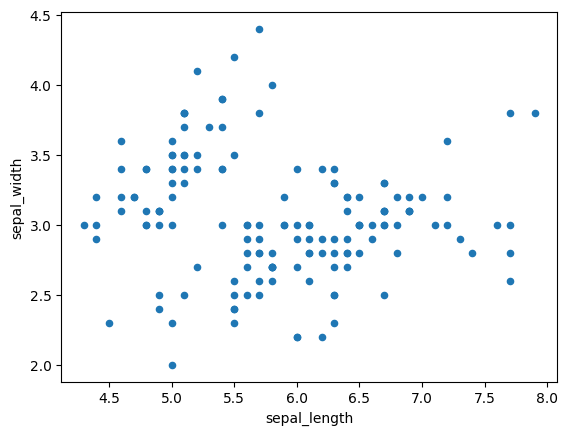

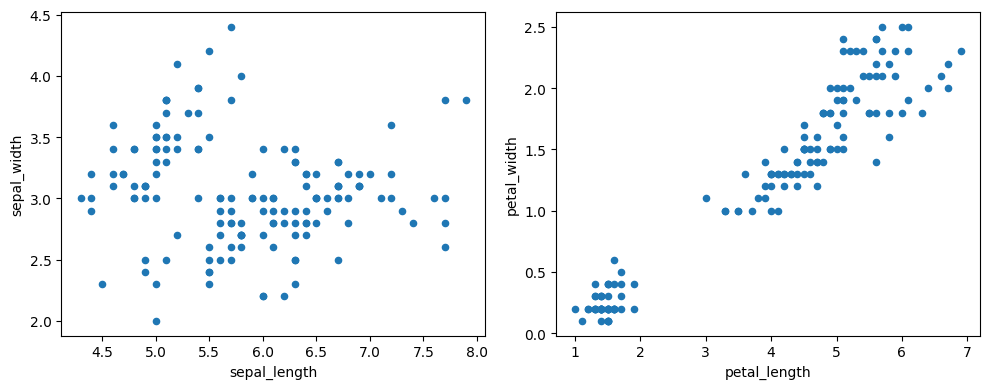

In [10]:
data.plot(kind='scatter',x='sepal_length', y='sepal_width') # создадим точечную диаграмму 
# далее постройте аналогичную диаграмму по petal_length	petal_width
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
data.plot(kind='scatter',x='sepal_length', y='sepal_width', ax=plt.gca())
plt.subplot(1,2,2)
data.plot(kind='scatter',x='petal_length', y='petal_width', ax=plt.gca())
plt.tight_layout()
plt.show()


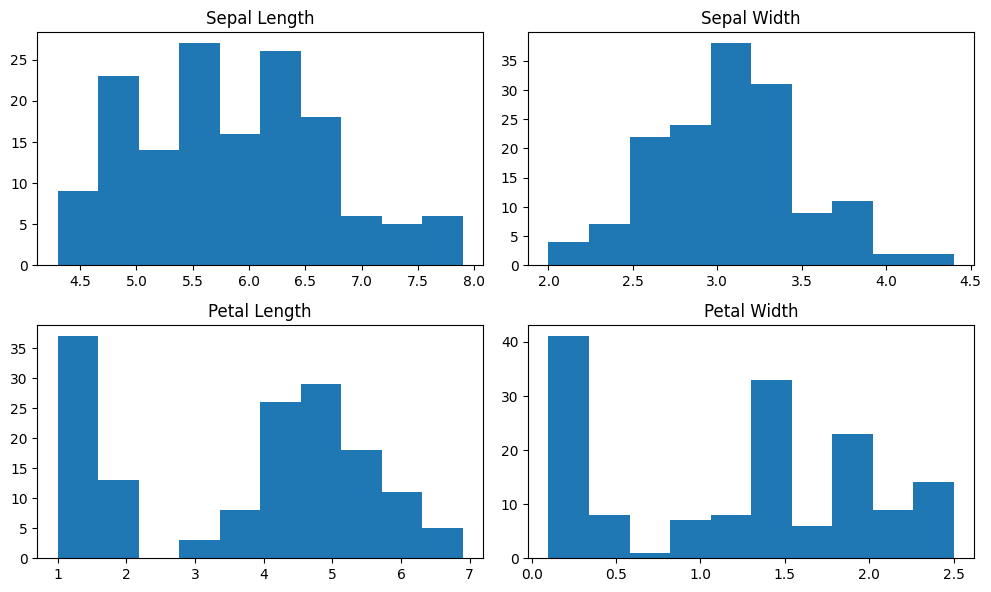

In [11]:
# Гистограммы по каждому параметру
n_bins = 10
fig, axs = plt.subplots(2, 2, figsize=(10,6))
axs[0,0].hist(data['sepal_length'], bins = n_bins); axs[0,0].set_title('Sepal Length');
axs[0,1].hist(data['sepal_width'], bins = n_bins); axs[0,1].set_title('Sepal Width');
axs[1,0].hist(data['petal_length'], bins = n_bins); axs[1,0].set_title('Petal Length');
axs[1,1].hist(data['petal_width'], bins = n_bins); axs[1,1].set_title('Petal Width');
fig.tight_layout(pad=1.0)

## 4. Разделение выборки

In [12]:
# Разделим выборку на обучающую и тестовую
train, test = train_test_split(data, test_size = 0.4, stratify = data['species'], random_state = 42)
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

## 5. Создание модели машинного обучения

In [14]:
# Деревья решений
# Параметр random_state задает начальную инициализацию генератора псевдслучайных чисел, чтобы данные были одинаковые при каждом запуске

#Выбираем классификатор
mod_dt = DecisionTreeClassifier(max_depth = 3, random_state = 1)
#Проводим обучение
mod_dt.fit(X_train,y_train)
models = {
    'Decision Tree': DecisionTreeClassifier(max_depth=3, random_state=1),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f'{name} Accuracy: {acc:.3f}')
    print(f'Confusion Matrix:\n{metrics.confusion_matrix(y_test, y_pred)}\n')

Decision Tree Accuracy: 0.983
Confusion Matrix:
[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]

KNN Accuracy: 0.967
Confusion Matrix:
[[20  0  0]
 [ 0 20  0]
 [ 0  2 18]]

Naive Bayes Accuracy: 0.933
Confusion Matrix:
[[20  0  0]
 [ 0 19  1]
 [ 0  3 17]]



## 6. Оценка качества модели машинного обучения

In [15]:
#Выполняем предсказание
y_pred=mod_dt.predict(X_test)

print('accuracy (точность) классификатора Деревья решений',"{:.3f}".format(metrics.accuracy_score(y_pred,y_test)))

# матрица ошибок
print("матрица ошибок")
print(metrics.confusion_matrix(y_test, y_pred))

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f'Лучшая модель: {best_model_name} с точностью {results[best_model_name]:.3f}\n')

accuracy (точность) классификатора Деревья решений 0.983
матрица ошибок
[[20  0  0]
 [ 0 19  1]
 [ 0  0 20]]
Лучшая модель: Decision Tree с точностью 0.983



## 7. Применение построенной модели машинного обучения

In [18]:
examples = pd.DataFrame({
    'sepal_length': [4.9, 6.7, 5.1],
    'sepal_width':  [3.6, 3.0, 2.5],
    'petal_length': [1.8, 5.2, 3.0],
    'petal_width':  [0.7, 2.3, 1.1]
})

predictions = best_model.predict(examples)
print("Примеры классификации:")
print(examples)
print("Предсказанные классы:", predictions)

Примеры классификации:
   sepal_length  sepal_width  petal_length  petal_width
0           4.9          3.6           1.8          0.7
1           6.7          3.0           5.2          2.3
2           5.1          2.5           3.0          1.1
Предсказанные классы: ['Iris-setosa' 'Iris-virginica' 'Iris-versicolor']
